# LAB 1

## Instalando dependências

### Importando pandas

In [ ]:
import pandas as pd

### Importando seaborn

In [1]:
import seaborn as sns
import matplotlib as plt

## Hands On

### Criando uma Serie

In [ ]:
series = pd.Series({"frutas": "banana", "cores": "amarelo"})

print(series)

### Criando um DataFrame

In [ ]:
dataframe = pd.DataFrame({"frutas": ["maça", "banana"], "cores": ["vermelho", "amarelo"]})

print(dataframe)

### Testando ambiente

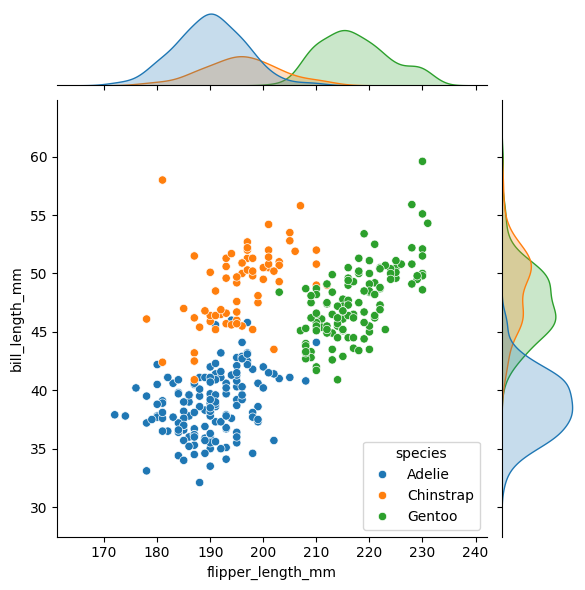

In [2]:
df = sns.load_dataset("penguins")
sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species")

# LAB 2

- CSV
- API
- Webscraping

In [ ]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

df = pd.read_csv("./data/CarPrice_Assignment.csv", sep=",")

url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json' 

response = requests.get(url).json() 

page = requests.get('https://web.archive.org/web/20121007172955/https://www.nga.gov/collection/anZ1.htm') 

soup = BeautifulSoup(page.text, 'html.parser') 

last_links = soup.find(class_='AlphaNav') 
last_links.decompose() 

artist_name_list = soup.find(class_='BodyText') 
artist_name_list_items = artist_name_list.find_all('a') 

# Usar .contents para pegar as tags <a> filhas 
for artist_name in artist_name_list_items: 
    names = artist_name.contents[0] 
    print(names)

# LAB 3

In [ ]:
import pandas as pd 
import seaborn as sns 

df = pd.read_csv("./data/CarPrice_Assignment.csv",sep=",")

df.head() # 5 primeiros registros
df.info()
df.describe() # Features numéricas - estatística descritiva
df.describe(include='O')

list(df.carbody.unique()) 

print(df['carbody'].value_counts())
print("-----------------")
print(df['fuelsystem'].value_counts()) 

colums_list = df.columns.to_list()

for column in colums_list:
    print(df[column].value_counts(), "\n")

In [ ]:
df['CarName'] = df['CarName'.replace('maxda', 'mazda')]
df['CarName'] = df['CarName'.replace('vw', 'volkswagen')]
df['CarName'] = df['CarName'.replace('vokswagen', 'volkswagen')]
df['CarName'] = df['CarName'.replace('Nissan', 'nissan')]
df['CarName'] = df['CarName'.replace('alfa-romero', 'alfa-romeo')]
df['CarName'].unique()

<Axes: >

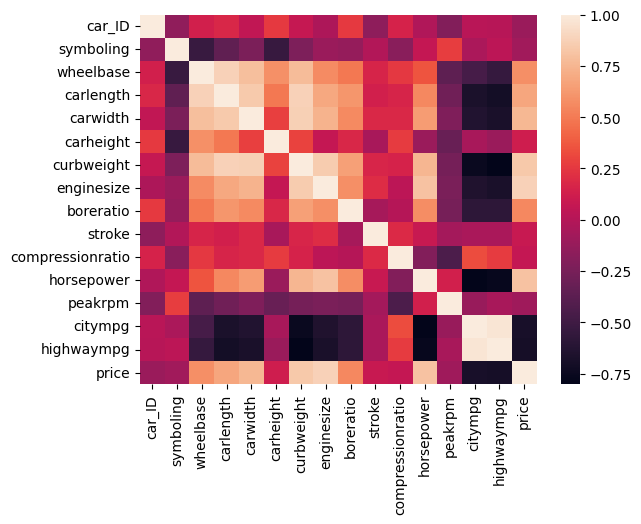

In [13]:
sns.heatmap(df.select_dtypes(include='number').corr())

## LAB 4

In [3]:
# Para chunks e embeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter # pip install langchain
from sentence_transformers import SentenceTransformer # pip install sentence_transformers

# Para leitura de PDF
import pdfplumber # pip install pdfplumber

# Para tratamento de texto
import re
import spacy # python -m spacy download pt_core_news_sm
import nltk # pip install nltk
from nltk.corpus import stopwords
# Baixando dados do NLTK necessários (se ainda não tiver)
# nltk.download('stopwords') # rodar apenas uma vez


# Bibliotecas para Banco de Dados Vetorial (Vector Database)
import chromadb
from langchain_chroma import Chroma

ModuleNotFoundError: No module named 'langchain'

In [ ]:
def ler_pdf(caminho_pdf):
    
    leitor_pdf = pdfplumber.open(caminho_pdf)
    # page = leitor_pdf.pages[0]
    texto = ""
    for pagina in range(len(leitor_pdf.pages)):
        texto += leitor_pdf.pages[pagina].extract_text()        

    texto = texto.replace("\n", " ")
    return texto

In [ ]:
# Carregar os documentos do PDF
arquivo_pdf = "C:/IA-Estudos/PLN/PDF/introducaoml.pdf"
texto_pdf = ler_pdf(arquivo_pdf)

# Tamanho do texto
print("Tamanho do texto em caracteres:",len(texto_pdf))

# Arquivo PDF original
print(texto_pdf)

In [ ]:
# PLN

# Carregar o modelo de linguagem do spaCy
nlp = spacy.load("pt_core_news_sm")

# Definir stopwords
api_stop_words = set(stopwords.words('portuguese'))
minhas_stop_words = {'a','e','i','o', 'u'}
stop_words = api_stop_words | minhas_stop_words

In [ ]:
# Função para fazer o tratamento de linguagem natural usando spaCy
def tratamento_pln(texto):

    # 1. Normalização: Colocar o texto em minúsculas
    texto = texto.lower()

    # 2. Remoção de números, pontuações e caracteres especiais
    texto = re.sub(r'[^a-zA-Záéíóú\s]', '', texto) # na expressão regular estão as exceções

    # 3. Tokenização com spaCy
    doc = nlp(texto)
    tokens = [token.text for token in doc]

    # 4. Remoção de stopwords, remoção de pontuação
    #    e Lematização (clean_tokens = tokens lematizados e sem stopwords)
    clean_tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
 
    # 5. Juntar tokens lematizados de volta em uma string
    clean_text = ' '.join(clean_tokens)

    return clean_text
    #return texto

In [ ]:
# Visualizando as Stop Words
print("Tamanho do conjunto stop_words:",len(stop_words),"\nStop_words ordenadas: \n",sorted(list(stop_words)))

# Chamada de PLN
texto_pdf_tratado = tratamento_pln(texto_pdf)

# Tamanho do texto
print("Tamanho do texto em caracteres:",len(texto_pdf))

# Arquivo PDF tratado
print(texto_pdf_tratado)

# Tamanho do texto tratado
print("Tamanho do texto em caracteres:",len(texto_pdf_tratado))

In [ ]:
# Dividindo os documentos em Chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=150, chunk_overlap=30)
chunks = text_splitter.split_text(texto_pdf_tratado)
print(chunks, len(chunks))

# Carregar o modelo de Embeddings bem como gerar os Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(chunks)

# Gerando IDs automaticamente
uids = [f"doc_{i}" for i in range(len(chunks))]

In [ ]:
# Criar o banco de dados
client = chromadb.Client()
collection = client.create_collection(name="machlrn")

#client.delete_collection("machlrn")

# Adicionar os documentos ao banco de dados
collection.add(documents=chunks, embeddings=embeddings, ids=uids)

# Realizar a busca usando collection.query
query_embedding = model.encode(["Como ensinar computadores a reconhecer padrões?"])
# query_embedding = model.encode(["Explique aprendizado não supervisionado"])
# query_embedding = model.encode(["Quais redes neurais são usadas em NLP?"])

results = collection.query(query_embeddings=query_embedding, n_results=1)
print(results)

# Imprimir os resultados
# Fazendo a varredura sobre os campos 'ids', 'distances' e 'documents'
for i in range(len(results['ids'][0])):
    doc_id = results['ids'][0][i]
    distance = results['distances'][0][i]
    document = results['documents'][0][i]
    
    print(f"ID: {doc_id}")
    print(f"Distância: {distance}")
    print(f"Documento: {document}")
    print("-" * 40)